# WeatherPy

In [99]:
#Install citipy 0.0.5
#!pip install citipy 

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

Requirements:
 - Use OpenWeatherAPI
 - Use CitiPy
 - Use Matplotlib and Seaborn Libaries



### Analysis

#### Observation 1
The max temperature is higher near the equator.  Figure P1 (Max Temperature vs Latitude) shows the concentration of high temperatures are distributed between -30 and 30 latitude.

#### Observation 2
Cities with a humidity of 70% or higher are concentrated in the northern hemisphere.  This doesnt necessarily mean that the southern hemisphere is less humid. 80.9% of the southern hemisphere surface area is water while the northern hemisphere is 60.7 (Wikipedia) yielding ~20% less surface area of land to sample cities from.  The sample size in this exercise was 4000.  The plots show in general that there are more cities in the northern hemisphere.

#### Observasion 3
Whether or not is cloudy doesnt seem to corralate with distance from the equator.  The sample set yields fairly even distribution between -50 and 75 latitude.  This is a large area spanning from about the middle of Greenland and the southern tip of Argentina.  

In [100]:
import json
import requests
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#OpenWeatherAPI Key
from config import api_key

### City Dictionary and DataFrame

In [101]:
# Create dictionary of citipy.citipy objects using citiPy library
coordinates = citipy.WORLD_CITIES_DICT

In [102]:
# create dataframe from dictionary 
wc_df = pd.DataFrame.from_dict(coordinates, orient='index')
wc_df = wc_df.reset_index(inplace = False)
wc_df = wc_df.rename(columns={'index': 'Coordinates'})
wc_df.head()

Coordinates                                                  0
0        (42.5, 1.5166667)  <citipy.citipy.City object at 0x00000291DA97F400>
1        (42.5666667, 1.6)  <citipy.citipy.City object at 0x00000291DA97F550>
2  (42.5333333, 1.5833333)  <citipy.citipy.City object at 0x00000291DA97F5F8>
3       (42.55, 1.5166667)  <citipy.citipy.City object at 0x00000291DA97F6D8>
4        (42.5, 1.5333333)  <citipy.citipy.City object at 0x00000291DA97F780>

In [103]:
# split values from Coordinates tuple into series.
wc_df[['lat', 'lng']] = wc_df['Coordinates'].apply(pd.Series)
wc_df.head()

Coordinates                                                  0  \
0        (42.5, 1.5166667)  <citipy.citipy.City object at 0x00000291DA97F400>   
1        (42.5666667, 1.6)  <citipy.citipy.City object at 0x00000291DA97F550>   
2  (42.5333333, 1.5833333)  <citipy.citipy.City object at 0x00000291DA97F5F8>   
3       (42.55, 1.5166667)  <citipy.citipy.City object at 0x00000291DA97F6D8>   
4        (42.5, 1.5333333)  <citipy.citipy.City object at 0x00000291DA97F780>   

         lat       lng  
0  42.500000  1.516667  
1  42.566667  1.600000  
2  42.533333  1.583333  
3  42.550000  1.516667  
4  42.500000  1.533333

In [104]:
# Take a sample of at least 500 cities.
cities_df = wc_df.sample(n=4000)
cities_df.head()

Coordinates  \
6881      (3.724614, -76.266749)   
19008         (26.233333, 79.85)   
15031  (15.3166667, -83.8666667)   
17765     (27.116667, 79.716667)   
36171         (44.4258, 39.5362)   

                                                       0        lat        lng  
6881   <citipy.citipy.City object at 0x00000291DAD89E80>   3.724614 -76.266749  
19008  <citipy.citipy.City object at 0x00000291DB4A9CF8>  26.233333  79.850000  
15031  <citipy.citipy.City object at 0x00000291DB254470>  15.316667 -83.866667  
17765  <citipy.citipy.City object at 0x00000291DB3F02B0>  27.116667  79.716667  
36171  <citipy.citipy.City object at 0x00000291DC00E160>  44.425800  39.536200

### Set up Parameters and Call loop to OpenWeather API

In [105]:
# set up params
params = {
    "appid": api_key
    
}

base_url = " http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Counter and lists for holding data
row_count = 0
cityname = []
humidity = []
temp = []
max_temp = []
cloudiness = []
wind_speed = []
latitude=[]

for index, row in cities_df.iterrows():

    # update params with coordinates each loop    
    lat = row['lat']
    lng = row['lng']
    
   
    # Build query URL
    query_url = base_url + "appid=" + api_key + "&lat=" + str(lat) + "&lon=" + str(lng)
    
    # Print log to ensure loop is working correctly
    print(f"Now retrieving city #{row_count}")
    row_count += 1

    # Run requests to grab the JSON at the requested URL
    response = requests.get(query_url)
    weather = response.json()
    print(response.url)
        
    # Append the lat/lng to the appropriate columns
    latitude.append(weather['coord']['lat'])
    cityname.append(weather['name'])
    humidity.append(weather['main']['humidity'])
    temp.append(weather['main']['temp'])
    max_temp.append(weather['main']['temp_max'])
    cloudiness.append(weather['clouds']['all'])
    wind_speed.append(weather['wind']['speed'])


Now retrieving city #0
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=3.724614&lon=-76.266749
Now retrieving city #1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=26.233333&lon=79.85
Now retrieving city #2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.3166667&lon=-83.8666667
Now retrieving city #3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=27.116667&lon=79.716667
Now retrieving city #4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.4258&lon=39.5362
Now retrieving city #5
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=27.1&lon=83.283333
Now retrieving city #6
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-8.833333&lon=-36.033333
Now retrieving city #55
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.416667&lon=-98.016667
Now retrieving city #56
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=23.053325&lon=113.512148
Now retrieving city #57
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.783333&lon=24.133333
Now retrieving city #58
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=21.833333&lon=-105.066667
Now retrieving city #59
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.8641667&lon=-122.8052778
Now retrieving city #60
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.233333&lon=4.533333
Now retrieving city #109
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.601944&lon=8.471944
Now retrieving city #110
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-9.583333&lon=-36.233333
Now retrieving city #111
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-29.14003&lon=-59.262564
Now retrieving city #112
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.05&lon=9.7
Now retrieving city #113
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=1.6561&lon=103.6032
Now retrieving city #114
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba9

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.9333333&lon=-86.1166667
Now retrieving city #163
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.275962&lon=120.566331
Now retrieving city #164
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=22.5666667&lon=59.5288889
Now retrieving city #165
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.349199&lon=15.920442
Now retrieving city #166
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.6163889&lon=5.9902778
Now retrieving city #167
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-5.916667&lon=-35.75
Now retrieving city #168
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.3&lon=73.25
Now retrieving city #217
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.0797222&lon=-66.9608333
Now retrieving city #218
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.1166667&lon=23.3
Now retrieving city #219
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.0333333&lon=25.6166667
Now retrieving city #220
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.6472222&lon=16.0441667
Now retrieving city #221
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=34.666667&lon=137.266667
Now retrieving city #222
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.883333&lon=140.683333
Now retrieving city #271
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.6227778&lon=22.9711111
Now retrieving city #272
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.094229&lon=45.471616
Now retrieving city #273
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.883333&lon=3.066667
Now retrieving city #274
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=19.916667&lon=-103.033333
Now retrieving city #275
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-22.526111&lon=-43.724722
Now retrieving city #276
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=81

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-10.1308333&lon=-76.2047222
Now retrieving city #325
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=4.922778&lon=119.793889
Now retrieving city #326
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-27.3&lon=-55.966667
Now retrieving city #327
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.783333&lon=81.783333
Now retrieving city #328
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.666667&lon=24.0
Now retrieving city #329
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.889925&lon=24.062929
Now retrieving city #330
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.3077778&lon=22.435
Now retrieving city #379
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=29.983333&lon=76.583333
Now retrieving city #380
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.4719&lon=124.0132
Now retrieving city #381
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.660169&lon=3.040672
Now retrieving city #382
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.3994444&lon=-84.5613889
Now retrieving city #383
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.65&lon=9.45
Now retrieving city #384
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=12.500556&lon=76.673333
Now retrieving city #433
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=20.166667&lon=-103.066667
Now retrieving city #434
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.35&lon=16.333333
Now retrieving city #435
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.55&lon=10.783333
Now retrieving city #436
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.218757&lon=29.194872
Now retrieving city #437
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=6.144444&lon=125.700833
Now retrieving city #438
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.862222&lon=40.455556
Now retrieving city #488
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.781801&lon=4.920852
Now retrieving city #489
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.666667&lon=23.95
Now retrieving city #490
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-21.7&lon=-47.266667
Now retrieving city #491
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.383333&lon=27.05
Now retrieving city #492
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=56.166667&lon=-3.15
Now retrieving city #493
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.4174&lon=122.8825
Now retrieving city #543
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-5.4833333&lon=143.7
Now retrieving city #544
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.876376&lon=-73.572843
Now retrieving city #545
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.867&lon=123.302
Now retrieving city #546
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.2736111&lon=-76.8847222
Now retrieving city #547
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.4330556&lon=-82.9241667
Now retrieving city #548
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=53.833333&lon=-2.2
Now retrieving city #597
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.1805556&lon=45.7283333
Now retrieving city #598
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.296247&lon=19.956785
Now retrieving city #599
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=38.7933333&lon=-77.2719444
Now retrieving city #600
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=32.9344444&lon=-97.2513889
Now retrieving city #601
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-29.8166667&lon=27.25
Now retrieving city #602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.0097222&lon=-93.3488889
Now retrieving city #652
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=36.0688889&lon=-79.4008333
Now retrieving city #653
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.716667&lon=11.65
Now retrieving city #654
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.1&lon=22.0
Now retrieving city #655
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.9902778&lon=-123.025
Now retrieving city #656
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.0561111&lon=65.4211111
Now retrieving city #657
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.7833333&lon=-82.8333333
Now retrieving city #706
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.715321&lon=23.912951
Now retrieving city #707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.4166667&lon=-84.4333333
Now retrieving city #708
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.752809&lon=127.479863
Now retrieving city #709
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.030556&lon=145.855556
Now retrieving city #710
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.590958&lon=18.117846
Now retrieving city #711
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.866667&lon=-4.033333
Now retrieving city #761
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.6514&lon=117.5599
Now retrieving city #762
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.224321&lon=-3.686515
Now retrieving city #763
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.850556&lon=139.891389
Now retrieving city #764
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.828488&lon=30.039566
Now retrieving city #765
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.483333&lon=26.283333
Now retrieving city #766
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-34.313499&lon=148.301071
Now retrieving city #816
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.2062&lon=120.7983
Now retrieving city #817
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=30.737604&lon=35.607747
Now retrieving city #818
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.8886111&lon=-88.0383333
Now retrieving city #819
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.6333333&lon=24.5833333
Now retrieving city #820
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.833333&lon=26.433333
Now retrieving city #821
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.1511111&lon=-72.6569444
Now retrieving city #871
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.826937&lon=124.103445
Now retrieving city #872
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.630556&lon=22.571389
Now retrieving city #873
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.800965&lon=87.600459
Now retrieving city #874
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.6531&lon=123.4344
Now retrieving city #875
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.681&lon=124.9595
Now retrieving city #876
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=16.766667&lon=77.133333
Now retrieving city #926
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.6997&lon=70.177
Now retrieving city #927
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.940337&lon=71.545547
Now retrieving city #928
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-7.033056&lon=107.518333
Now retrieving city #929
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.6028&lon=122.3687
Now retrieving city #930
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.766667&lon=5.783333
Now retrieving city #931
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-16.4&lon=-67.5166667
Now retrieving city #980
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=28.9172222&lon=-81.9230556
Now retrieving city #981
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.613889&lon=44.089444
Now retrieving city #982
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.178056&lon=43.501944
Now retrieving city #983
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=29.711389&lon=118.3125
Now retrieving city #984
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.1797222&lon=-76.1791667
Now retrieving city #985
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.9363889&lon=-71.0538889
Now retrieving city #1034
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.112778&lon=125.429167
Now retrieving city #1035
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=59.1263889&lon=26.25
Now retrieving city #1036
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.2666667&lon=-9.7166667
Now retrieving city #1037
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.15&lon=-96.883333
Now retrieving city #1038
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.8177778&lon=-88.1733333
Now retrieving city #1039
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.35&lon=10.133333
Now retrieving city #1088
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=6.280456&lon=-75.443537
Now retrieving city #1089
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-24.6269444&lon=25.8655556
Now retrieving city #1090
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=12.2005556&lon=-86.0938889
Now retrieving city #1091
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=36.716111&lon=37.115
Now retrieving city #1092
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=6.900694&lon=-73.283472
Now retrieving city #1093
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=817

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=26.926667&lon=83.715278
Now retrieving city #1142
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.608333&lon=-97.416667
Now retrieving city #1143
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=22.233333&lon=-102.1
Now retrieving city #1144
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.15&lon=7.666667
Now retrieving city #1145
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.8&lon=14.683333
Now retrieving city #1146
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.6&lon=-65.75
Now retrieving city #1147
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba9

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.475281&lon=8.520368
Now retrieving city #1196
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-36.833333&lon=-73.05
Now retrieving city #1197
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.65&lon=-74.333333
Now retrieving city #1198
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.008511&lon=-3.00731
Now retrieving city #1199
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-0.9575&lon=29.7897222
Now retrieving city #1200
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.6786111&lon=-73.5894444
Now retrieving city #1201
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.141642&lon=5.584486
Now retrieving city #1250
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=4.898056&lon=-74.436944
Now retrieving city #1251
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=38.6533333&lon=-94.3486111
Now retrieving city #1252
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.137167&lon=18.96641
Now retrieving city #1253
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.889087&lon=26.856362
Now retrieving city #1254
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.8807&lon=120.389
Now retrieving city #1255
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-3.566667&lon=-41.083333
Now retrieving city #1305
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.607778&lon=-90.803056
Now retrieving city #1306
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.0666667&lon=-63.0833333
Now retrieving city #1307
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.278425&lon=17.985831
Now retrieving city #1308
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.5333333&lon=-80.0333333
Now retrieving city #1309
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.033333&lon=23.066667
Now retrieving city #1310
http://api.openweathermap.org/data/2.5/weather?units=Imperial&a

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.7666667&lon=-16.7
Now retrieving city #1360
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.160948&lon=-75.048108
Now retrieving city #1361
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.4502778&lon=-88.8183333
Now retrieving city #1362
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.7&lon=21.0
Now retrieving city #1363
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.8113&lon=121.1443
Now retrieving city #1364
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.1958333&lon=-85.1847222
Now retrieving city #1365
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.7166667&lon=-87.2
Now retrieving city #1414
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.727783&lon=47.617878
Now retrieving city #1415
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=25.2884&lon=79.3347
Now retrieving city #1416
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=17.35&lon=82.55
Now retrieving city #1417
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.866667&lon=-3.55
Now retrieving city #1418
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.955279&lon=39.588938
Now retrieving city #1419
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=57.492593&lon=39.756286
Now retrieving city #1468
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.8791667&lon=-10.7877778
Now retrieving city #1469
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.150769&lon=33.28151
Now retrieving city #1470
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-13.5927778&lon=-71.7719444
Now retrieving city #1471
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.9911111&lon=-106.08
Now retrieving city #1472
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-20.266667&lon=-40.416667
Now retrieving city #1473
http://api.openweathermap.org/data/2.5/weather?units=Imperial&ap

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=31.5938889&lon=-97.1086111
Now retrieving city #1522
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.166667&lon=3.933333
Now retrieving city #1523
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.6688889&lon=-87.7386111
Now retrieving city #1524
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.4666667&lon=-112.0333333
Now retrieving city #1525
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=53.9059&lon=86.719
Now retrieving city #1526
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.755525&lon=17.579452
Now retrieving city #1527
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.766667&lon=25.65
Now retrieving city #1577
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.9&lon=16.833333
Now retrieving city #1578
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.083333&lon=24.383333
Now retrieving city #1579
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.315417&lon=19.078245
Now retrieving city #1580
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.616667&lon=93.883333
Now retrieving city #1581
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.133333&lon=24.35
Now retrieving city #1582
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.8726&lon=123.5209
Now retrieving city #1632
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.866667&lon=79.433333
Now retrieving city #1633
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.03783&lon=18.401537
Now retrieving city #1634
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.776667&lon=20.225278
Now retrieving city #1635
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-33.516667&lon=-53.35
Now retrieving city #1636
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.8491667&lon=-118.3875
Now retrieving city #1637
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.282977&lon=123.78
Now retrieving city #1687
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.9472222&lon=-118.0844444
Now retrieving city #1688
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.610955&lon=-72.647735
Now retrieving city #1689
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.527222&lon=125.675278
Now retrieving city #1690
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.57226&lon=123.101202
Now retrieving city #1691
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.783333&lon=-91.483333
Now retrieving city #1692
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.856013&lon=17.123073
Now retrieving city #1741
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=28.5024&lon=53.5534
Now retrieving city #1742
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-32.033333&lon=-52.083333
Now retrieving city #1743
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.89155&lon=-4.772748
Now retrieving city #1744
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=12.1897222&lon=-1.8855556
Now retrieving city #1745
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.4943&lon=122.6314
Now retrieving city #1746
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.7852778&lon=75.6911111
Now retrieving city #1795
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-0.3088889&lon=32.225
Now retrieving city #1796
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.2830556&lon=-96.0772222
Now retrieving city #1797
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.9886111&lon=41.7633333
Now retrieving city #1798
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-8.4166667&lon=-76.3833333
Now retrieving city #1799
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.6&lon=8.866667
Now retrieving city #1800
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=58.966667&lon=5.75
Now retrieving city #1849
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.85&lon=-73.766667
Now retrieving city #1850
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=22.166667&lon=76.85
Now retrieving city #1851
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.3147222&lon=18.6841667
Now retrieving city #1852
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.1833333&lon=35.95
Now retrieving city #1853
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.683333&lon=8.7
Now retrieving city #1854
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=20.2&lon=-89.283333
Now retrieving city #1903
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.666667&lon=-89.5
Now retrieving city #1904
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.1&lon=-86.3666667
Now retrieving city #1905
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-12.4&lon=-74.9
Now retrieving city #1906
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.8&lon=12.433333
Now retrieving city #1907
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.974309&lon=-75.361954
Now retrieving city #1908
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.151944&lon=43.469722
Now retrieving city #1958
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=4.1333333&lon=15.15
Now retrieving city #1959
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.3919444&lon=21.9241667
Now retrieving city #1960
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-25.113194&lon=29.044538
Now retrieving city #1961
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.716667&lon=78.133333
Now retrieving city #1962
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.85&lon=6.866667
Now retrieving city #1963
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be07

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.9&lon=-3.633333
Now retrieving city #2013
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=61.733333&lon=30.683333
Now retrieving city #2014
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.75&lon=-88.1166667
Now retrieving city #2015
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=32.700175&lon=51.521134
Now retrieving city #2016
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=25.293133&lon=68.812007
Now retrieving city #2017
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.7625&lon=-70.7222222
Now retrieving city #2018
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.233333&lon=79.733333
Now retrieving city #2067
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.3333333&lon=19.6666667
Now retrieving city #2068
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.1&lon=5.8
Now retrieving city #2069
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.609481&lon=21.208036
Now retrieving city #2070
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.483333&lon=20.733333
Now retrieving city #2071
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.3433333&lon=18.9997222
Now retrieving city #2072
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.9&lon=-1.15
Now retrieving city #2122
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.95&lon=-78.3
Now retrieving city #2123
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=19.45&lon=-70.7
Now retrieving city #2124
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.8361111&lon=-87.59
Now retrieving city #2125
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.467761&lon=17.027457
Now retrieving city #2126
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.3697222&lon=24.6972222
Now retrieving city #2127
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d21

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-19.333333&lon=-41.25
Now retrieving city #2177
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.016667&lon=5.583333
Now retrieving city #2178
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=27.734444&lon=111.994444
Now retrieving city #2179
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.1766667&lon=-87.1363889
Now retrieving city #2180
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.1&lon=-101.266667
Now retrieving city #2181
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.516667&lon=9.583333
Now retrieving city #2182
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.7833333&lon=21.6833333
Now retrieving city #2231
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.6691667&lon=-108.7708333
Now retrieving city #2232
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.1&lon=9.5333333
Now retrieving city #2233
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-10.833333&lon=-42.733333
Now retrieving city #2234
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.499444&lon=73.0975
Now retrieving city #2235
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=61.133333&lon=22.133333
Now retrieving city #2236
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.9&lon=92.6
Now retrieving city #2285
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.3337&lon=122.8637
Now retrieving city #2286
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.2&lon=77.283333
Now retrieving city #2287
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.931667&lon=126.289444
Now retrieving city #2288
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.6&lon=26.4166667
Now retrieving city #2289
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.4425&lon=49.948056
Now retrieving city #2290
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d21

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.718542&lon=18.41085
Now retrieving city #2339
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.5505556&lon=-107.3241667
Now retrieving city #2340
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=38.9636111&lon=-76.9911111
Now retrieving city #2341
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.383333&lon=15.1
Now retrieving city #2342
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=53.144032&lon=7.03518
Now retrieving city #2343
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.246667&lon=19.879444
Now retrieving city #2344
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=817

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.966667&lon=77.3
Now retrieving city #2393
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.9273&lon=94.7999
Now retrieving city #2394
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.3&lon=14.3
Now retrieving city #2395
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.2169444&lon=-74.7433333
Now retrieving city #2396
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.934052&lon=12.50485
Now retrieving city #2397
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=38.5580556&lon=-91.0119444
Now retrieving city #2398
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b6

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=58.360833&lon=59.806667
Now retrieving city #2448
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=60.383333&lon=-1.35
Now retrieving city #2449
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.2333333&lon=-85.3833333
Now retrieving city #2450
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.133333&lon=2.75
Now retrieving city #2451
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.272506&lon=-73.309107
Now retrieving city #2452
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.4779&lon=123.1367
Now retrieving city #2453
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-23.55&lon=-46.933333
Now retrieving city #2503
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=1.3038&lon=124.9112
Now retrieving city #2504
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-10.1666667&lon=31.3833333
Now retrieving city #2505
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.383333&lon=24.05
Now retrieving city #2506
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-9.7166667&lon=33.2666667
Now retrieving city #2507
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=6.0666667&lon=-8.1280556
Now retrieving city #2508
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.9902&lon=122.8142
Now retrieving city #2558
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=53.4034&lon=84.0009
Now retrieving city #2559
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=12.9924&lon=124.0169
Now retrieving city #2560
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=58.24898&lon=52.102576
Now retrieving city #2561
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.584941&lon=18.393253
Now retrieving city #2562
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-22.433333&lon=-45.45
Now retrieving city #2563
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.786389&lon=21.794444
Now retrieving city #2612
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-18.7666667&lon=46.0333333
Now retrieving city #2613
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-19.666667&lon=-43.916667
Now retrieving city #2614
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-1.2166667&lon=174.75
Now retrieving city #2615
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=25.0666667&lon=91.4
Now retrieving city #2616
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.771667&lon=40.155278
Now retrieving city #2617
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=817

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.52349&lon=5.071676
Now retrieving city #2666
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=26.7680556&lon=31.4938889
Now retrieving city #2667
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-7.1&lon=109.016667
Now retrieving city #2668
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.9286111&lon=-74.0402778
Now retrieving city #2669
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.552778&lon=141.906389
Now retrieving city #2670
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=64.45&lon=12.333333
Now retrieving city #2671
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.845686&lon=-8.823322
Now retrieving city #2721
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.823056&lon=10.771667
Now retrieving city #2722
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.686712&lon=16.621677
Now retrieving city #2723
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=60.144399&lon=30.201649
Now retrieving city #2724
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.6225&lon=20.8875
Now retrieving city #2725
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=56.860179&lon=68.637538
Now retrieving city #2726
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-7.9666667&lon=145.7666667
Now retrieving city #2775
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=29.5633333&lon=-95.2858333
Now retrieving city #2776
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=19.466667&lon=-104.65
Now retrieving city #2777
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=36.726666&lon=-4.434802
Now retrieving city #2778
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.961389&lon=121.198056
Now retrieving city #2779
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.563098&lon=3.627137
Now retrieving city #2780
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-18.016667&lon=-49.366667
Now retrieving city #2830
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.1497222&lon=44.4344444
Now retrieving city #2831
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.929336&lon=37.991166
Now retrieving city #2832
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.833333&lon=20.7
Now retrieving city #2833
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.505&lon=141.491944
Now retrieving city #2834
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-20.833333&lon=-48.8
Now retrieving city #2835
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be07

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.2258&lon=122.9275
Now retrieving city #2885
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.815047&lon=31.159815
Now retrieving city #2886
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=6.671693&lon=-73.174205
Now retrieving city #2887
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.933333&lon=14.25
Now retrieving city #2888
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-31.588926&lon=28.784431
Now retrieving city #2889
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=30.871229&lon=105.384542
Now retrieving city #2890
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.67&lon=43.8663889
Now retrieving city #2940
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.925&lon=-86.8688889
Now retrieving city #2941
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-2.683333&lon=-57.666667
Now retrieving city #2942
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.877222&lon=115.770278
Now retrieving city #2943
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=19.908056&lon=-99.1475
Now retrieving city #2944
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.666667&lon=38.216667
Now retrieving city #2945
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.418889&lon=85.702222
Now retrieving city #2994
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.315033&lon=23.13248
Now retrieving city #2995
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.9088889&lon=-89.4958333
Now retrieving city #2996
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-1.183333&lon=-48.133333
Now retrieving city #2997
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.666667&lon=-1.433333
Now retrieving city #2998
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.5159&lon=123.2834
Now retrieving city #2999
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=81

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-12.640556&lon=-47.7925
Now retrieving city #3049
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.3835&lon=121.4786
Now retrieving city #3050
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=21.166667&lon=-98.9
Now retrieving city #3051
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.783333&lon=75.116667
Now retrieving city #3052
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=16.443306&lon=101.147528
Now retrieving city #3053
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-24.133333&lon=-57.083333
Now retrieving city #3054
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=34.55&lon=133.266667
Now retrieving city #3104
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=34.6172222&lon=-79.685
Now retrieving city #3105
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-20.2484&lon=-43.8063
Now retrieving city #3106
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-18.3666667&lon=-66.9666667
Now retrieving city #3107
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.31591&lon=7.693047
Now retrieving city #3108
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.840141&lon=123.058304
Now retrieving city #3109
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.766667&lon=79.833333
Now retrieving city #3157
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=23.9575&lon=120.5733333
Now retrieving city #3158
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=17.375278&lon=78.474444
Now retrieving city #3159
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.160886&lon=-5.828783
Now retrieving city #3160
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.9179&lon=121.1246
Now retrieving city #3161
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.2&lon=4.516667
Now retrieving city #3162
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-1.05&lon=-46.766667
Now retrieving city #3211
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=30.128189&lon=111.778369
Now retrieving city #3212
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.565142&lon=-73.450173
Now retrieving city #3213
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=62.05&lon=-7.1333333
Now retrieving city #3214
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=9.134&lon=122.9193
Now retrieving city #3215
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.568158&lon=123.472302
Now retrieving city #3216
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.6666667&lon=-88.2
Now retrieving city #3265
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.828077&lon=54.987396
Now retrieving city #3266
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.366667&lon=25.183333
Now retrieving city #3267
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.037222&lon=119.288889
Now retrieving city #3268
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.5&lon=106.9833333
Now retrieving city #3269
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=43.9013889&lon=-70.4708333
Now retrieving city #3270
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.593056&lon=124.017778
Now retrieving city #3320
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.133333&lon=-94.133333
Now retrieving city #3321
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-4.833333&lon=-37.783333
Now retrieving city #3322
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.4&lon=24.05
Now retrieving city #3323
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.2166667&lon=20.9
Now retrieving city #3324
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.470495&lon=8.31636
Now retrieving city #3325
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.5&lon=26.75
Now retrieving city #3375
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.164167&lon=76.666667
Now retrieving city #3376
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.45&lon=8.85
Now retrieving city #3377
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=29.15&lon=77.616667
Now retrieving city #3378
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.115886&lon=48.192039
Now retrieving city #3379
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=15.8112&lon=120.4737
Now retrieving city #3380
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d21

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=32.033333&lon=131.433333
Now retrieving city #3430
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=38.93213&lon=-9.257785
Now retrieving city #3431
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=32.3861111&lon=-94.8755556
Now retrieving city #3432
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.95&lon=-4.566667
Now retrieving city #3433
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=39.9380556&lon=-75.2722222
Now retrieving city #3434
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=56.023172&lon=47.050535
Now retrieving city #3435
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-4.0166667&lon=35.7666667
Now retrieving city #3485
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-24.25&lon=-49.7
Now retrieving city #3486
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=7.381944&lon=-6.477778
Now retrieving city #3487
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-26.716667&lon=-55.083333
Now retrieving city #3488
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.3&lon=6.316667
Now retrieving city #3489
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=14.5299&lon=121.2561
Now retrieving city #3490
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=16.58975&lon=103.235472
Now retrieving city #3540
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.7833333&lon=-82.4333333
Now retrieving city #3541
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.8325&lon=-105.336389
Now retrieving city #3542
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.2166667&lon=-2.35
Now retrieving city #3543
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=26.8&lon=94.533333
Now retrieving city #3544
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=10.766667&lon=122.533333
Now retrieving city #3545
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.9569&lon=31.9703
Now retrieving city #3594
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=22.797778&lon=88.365833
Now retrieving city #3595
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-19.533333&lon=-44.75
Now retrieving city #3596
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.532778&lon=20.028333
Now retrieving city #3597
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=13.4068&lon=121.175
Now retrieving city #3598
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-8.366667&lon=-35.233333
Now retrieving city #3599
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.2961111&lon=-86.8436111
Now retrieving city #3648
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=36.25&lon=139.533333
Now retrieving city #3649
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=55.566667&lon=-2.65
Now retrieving city #3650
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.8086&lon=8.0812
Now retrieving city #3651
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=16.609376&lon=121.18614
Now retrieving city #3652
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=37.6666667&lon=21.6166667
Now retrieving city #3653
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.2675&lon=-66.7008333
Now retrieving city #3703
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=52.156875&lon=6.739496
Now retrieving city #3704
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.4&lon=48.5
Now retrieving city #3705
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-21.3666667&lon=55.6166667
Now retrieving city #3706
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.1&lon=27.883333
Now retrieving city #3707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.866667&lon=23.433333
Now retrieving city #3708
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.2841667&lon=-84.1555556
Now retrieving city #3758
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.8152778&lon=-73.0455556
Now retrieving city #3759
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=35.7282&lon=50.8134
Now retrieving city #3760
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=26.666667&lon=79.183333
Now retrieving city #3761
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=58.233333&lon=8.133333
Now retrieving city #3762
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-20.4188889&lon=57.5441667
Now retrieving city #3763
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=-9.446667&lon=-46.300278
Now retrieving city #3814
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.177848&lon=17.517417
Now retrieving city #3815
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=12.5642&lon=124.9276
Now retrieving city #3816
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=5.829683&lon=-72.843321
Now retrieving city #3817
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=33.7644444&lon=-117.7930556
Now retrieving city #3818
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=8.017222&lon=123.848056
Now retrieving city #3819
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=45.2502778&lon=-93.2497222
Now retrieving city #3869
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.441457&lon=-8.384116
Now retrieving city #3870
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=47.589572&lon=18.760988
Now retrieving city #3871
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=42.6525&lon=-73.7566667
Now retrieving city #3872
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=18.15&lon=-97.133333
Now retrieving city #3873
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=44.7&lon=23.05
Now retrieving city #3874
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=53.45&lon=-2.35
Now retrieving city #3924
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=24.033333&lon=84.066667
Now retrieving city #3925
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=46.38&lon=15.0486111
Now retrieving city #3926
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=41.7352778&lon=-70.1944444
Now retrieving city #3927
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=51.383333&lon=8.083333
Now retrieving city #3928
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=11.266667&lon=78.516667
Now retrieving city #3929
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=40.0311111&lon=20.2630556
Now retrieving city #3979
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=50.433333&lon=7.666667
Now retrieving city #3980
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=48.620287&lon=7.770066
Now retrieving city #3981
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.788652&lon=13.976619
Now retrieving city #3982
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=54.8221&lon=61.588
Now retrieving city #3983
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074e02b14b682ba914d2119cb4&lat=49.6166667&lon=5.9525
Now retrieving city #3984
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8174be074

### Dataframe for Plots

In [107]:
w_df = pd.DataFrame({
    'City Name':cityname,
    'Humidity':  humidity,
    'Current Temp': temp,
    'Max Temp': max_temp,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Latitude': latitude,
                    })
w_df.head()

City Name  Cloudiness  Current Temp  Humidity  Latitude  Max Temp  \
0         Ginebra          75         82.40        61      3.72     82.40   
1       Pukhrayan          44         87.52        37     26.23     87.52   
2  Puerto Lempira          75         84.20        74     15.32     84.20   
3    Gursahaiganj           0         82.03        44     27.12     82.03   
4     Khadyzhensk          68         66.28        40     44.43     66.28   

   Wind Speed  
0       12.75  
1        9.33  
2        9.17  
3        7.20  
4        9.33

#### Temperature (F) vs. Latitude

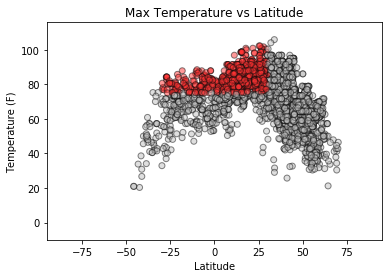

In [108]:
#set color conditions'

value=(abs(w_df['Latitude']) <= 30) & (abs(w_df['Max Temp'])>= 75)
w_df['color']= np.where( value==True , "#FF3333", "#C0C0C0")

p1 = sns.regplot(x = w_df['Latitude'], y = w_df['Max Temp'], truncate = False, 
                 scatter_kws={'facecolors':w_df['color'], 'edgecolors': '#0A0A0A', 
                              'alpha': .50}, fit_reg=False)

ylim = w_df["Max Temp"].max() + 10
p1.set(ylim=(-10, ylim))
p1.set(xlim=(-95, 95))
p1.set_title("Max Temperature vs Latitude")
p1.set_ylabel("Temperature (F)")
plt.show()

#### Humidity (%) vs. Latitude

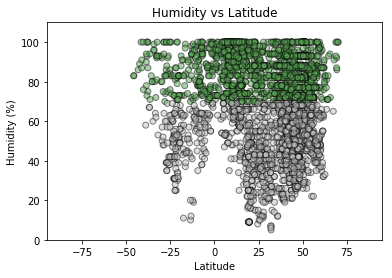

In [109]:
#set color conditions
value=(abs(w_df['Humidity'])>= 70)
w_df['color']= np.where( value==True , "#59a454", "#C0C0C0")

p2 = sns.regplot(x = w_df['Latitude'], y = w_df['Humidity'], truncate = False, 
                 scatter_kws={'facecolors':w_df['color'], 'edgecolors': '#0A0A0A', 
                               'alpha': .50}, fit_reg=False)
ylim = w_df["Humidity"].max() + 10

p2.set(ylim=(0, ylim))
p2.set(xlim=(-95, 95))
p2.set_title("Humidity vs Latitude")
p2.set_ylabel("Humidity (%)")
plt.show()

#### Cloudiness (%) vs. Latitude

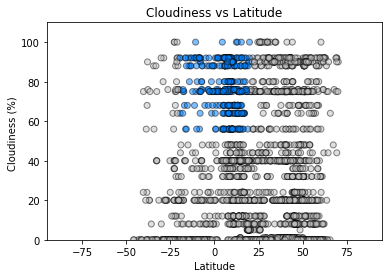

In [110]:
#set color conditions
value=(abs(w_df['Latitude']) <= 20) & (abs(w_df['Cloudiness'])>= 50)
w_df['color']= np.where( value==True , "#0080ff", "#C0C0C0")

p3 = sns.regplot(x = w_df['Latitude'], y = w_df['Cloudiness'], truncate = False,
                 scatter_kws={'facecolors':w_df['color'], 'edgecolors': '#0A0A0A',
                                'alpha': .50}, fit_reg=False)

ylim = w_df["Cloudiness"].max() + 10

p3.set(ylim=(0, ylim))
p3.set(xlim=(-95, 95))
p3.set_title("Cloudiness vs Latitude")
p3.set_ylabel("Cloudiness (%) ")
plt.show()

#### Wind Speed (mph) vs. Latitude

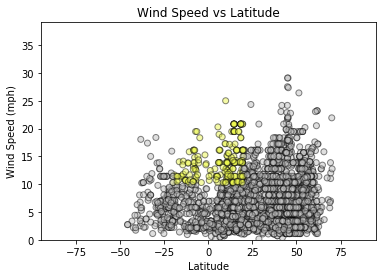

In [111]:
#set color conditions
value=(abs(w_df['Latitude']) <= 20) & (abs(w_df['Wind Speed'])>= 10)
w_df['color']= np.where( value==True , "#ecf74f", "#C0C0C0")

p4 = sns.regplot(x = w_df['Latitude'], y = w_df['Wind Speed'], truncate = False,
                 scatter_kws={'facecolors':w_df['color'], 'edgecolors': '#0A0A0A',
                              'alpha': .50}, fit_reg=False)
ylim = w_df["Wind Speed"].max() + 10

p4.set(ylim=(0, ylim))
p4.set(xlim=(-95, 95))
p4.set_title("Wind Speed vs Latitude")
p4.set_ylabel("Wind Speed (mph)")
plt.show()

#### Save Results to CSV

In [112]:
w_df.to_csv("weatherpy.csv")

# See it saved!
import os
os.listdir()

['.ipynb_checkpoints',
 'config.py',
 'weatherpy.csv',
 'WeatherPy.ipynb',
 '__pycache__']